| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |

# Normalisation and Spider Plots
##### *~10 min*

In [32]:
import matplotlib.pyplot as plt
from pyrolite.util.synthetic import example_spider_data

df = example_spider_data(start="DM_SS2004", norm_to=None, noise_level=0.2) # unnormalised dataframe based around depleted mantle

### Spider Plots

Visualisation of multivariate patterns in geochemical data can be a challenge, but one tool well adpated to is the 'spiderplot'. In most cases, you'll want to visualise normalised data (e.g. to Chondrite or Primitive Mantle) such that the effects of nuceleosynthesis and planetary formation are removed and you can instead dig deeper into processes which have happend since. The `pyrolite.pyrochem` API can be chained together with the `pyolite.pyroplot` API to do this in one line.

<AxesSubplot:>

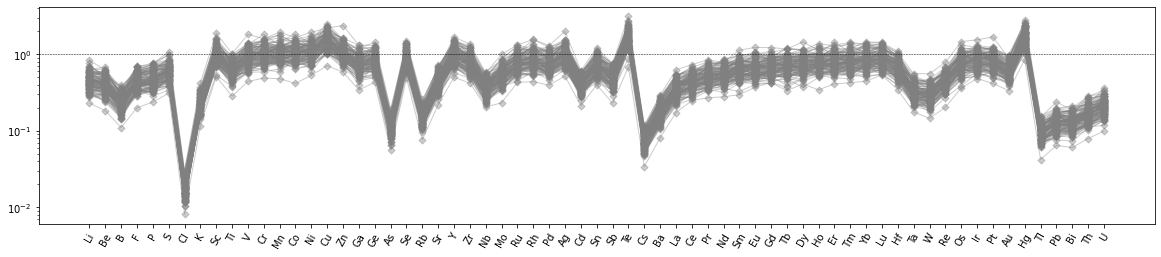

In [7]:
df.pyrochem.normalize_to('PM_PON', units='ppm').pyroplot.spider(unity_line=True, color='0.5', alpha=0.4, figsize=(20, 4))

For now we'll save the normalised dataframe, as that's what we'll be working with:

In [9]:
normdf = df.pyrochem.normalize_to('PM_PON', units='ppm')

There's a range of styling options for spider plots, and if needed you can even style the lines and markers differently! For example, we can map the color to a specific element, ratio or other variable:

<AxesSubplot:>

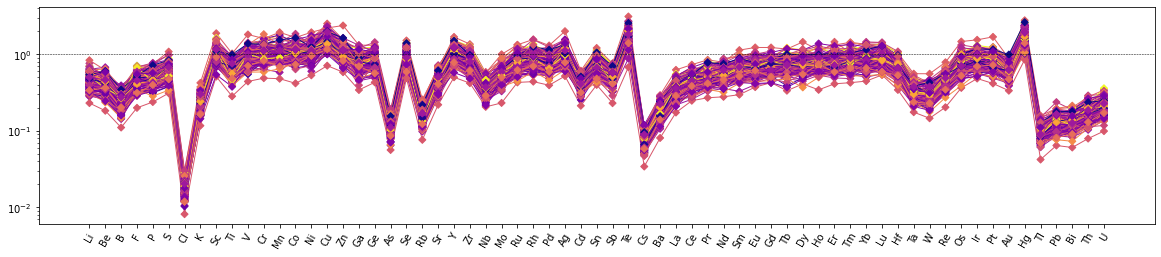

In [30]:
normdf.pyroplot.spider(unity_line=True, color=normdf.pyrochem.get_ratio('Sc/Ti'), cmap='plasma', figsize=(20, 4))

When it comes to ordering your axes, `spider` will generally use the order in which you provide the dataframe. There's a few automated indexing options, however:

<AxesSubplot:>

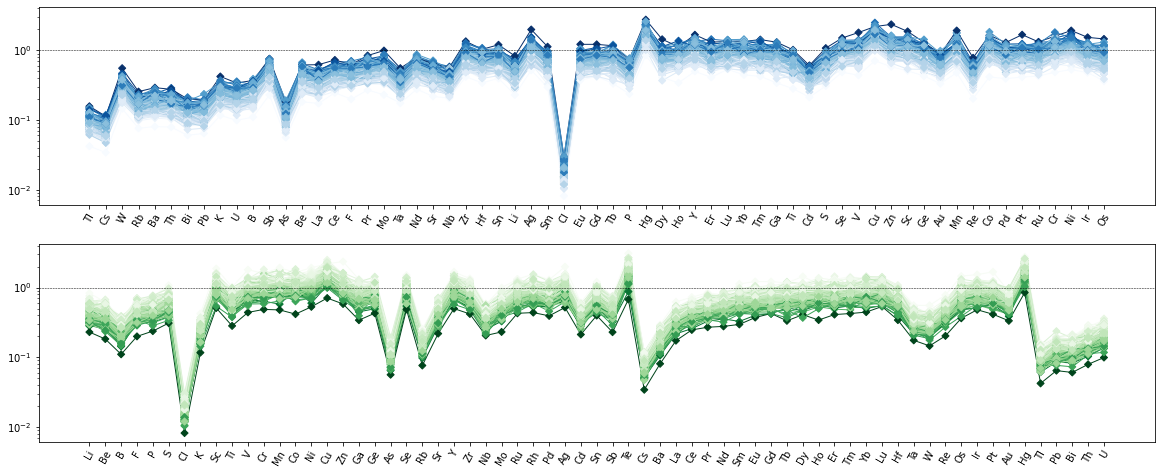

In [34]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(20, 8))
normdf.pyroplot.spider(ax=ax[0], unity_line=True, color=normdf['Ni'], cmap='Blues', index_order='incompatibility')
normdf.pyroplot.spider(ax=ax[1], unity_line=True, color=1/normdf['Ni'], cmap='Greens', index_oder='number')

We can also make conditional density spider plots:

<AxesSubplot:>

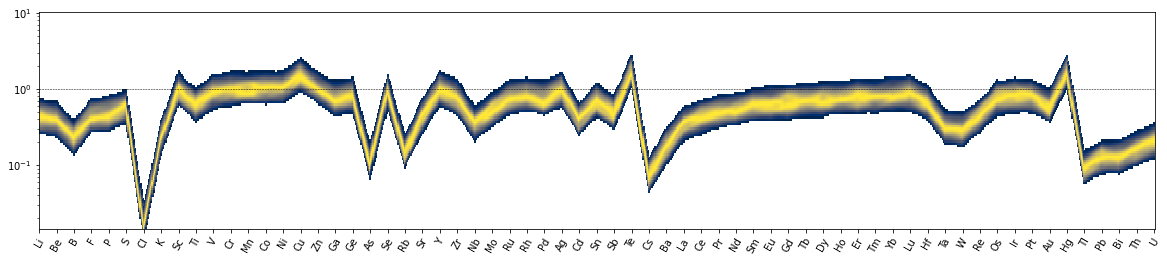

In [16]:
normdf.pyroplot.spider(unity_line=True, mode='binkde', bins=100, yextent=(0.1, 1.5), vmin=0.03, cmap='cividis', resolution=15, figsize=(20, 4))

For the REE data specifically, there's also a method which will scale axes to ionic radii:

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

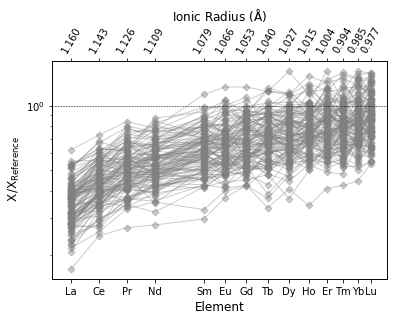

In [10]:
normdf.pyroplot.REE(unity_line=True, color='0.5', alpha=0.4)

We can also style this as above, including by colormapping a particular variable:

<AxesSubplot:xlabel='Element', ylabel=' $\\mathrm{X / X_{Reference}}$'>

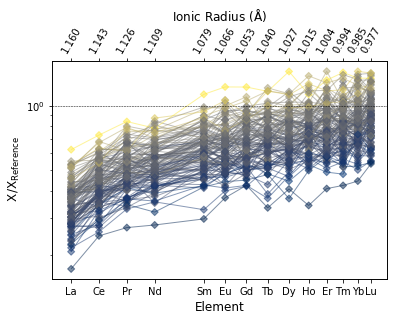

In [11]:
normdf.pyroplot.REE(unity_line=True, c=df['MgO'], cmap='cividis', alpha=0.5)

----
<div class='alert alert-warning'> <b> <font size="+1">Checkpoint & Time Check</font></b><br>How are things going?</div>

----

| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |